Problem Statement  
A company wants to predict employee productivity scores to improve workforce planning and training programs. You are hired as a Data Scientist to build a multivariate linear regression model that predicts an employee’s Productivity Score based on multiple work-related factors. 

Experience (yrs),Training Hours,Working Hours,Projects 
,Productivity Score 
2,40,38,3,62 
5,60,42,6,78 
1,20,35,2,55 
8,80,45,8,88 
4,50,40,5,72 
10,90,48,9,92 
3,30,37,4,65 
6,70,44,7,82 
7,75,46,7,85 
2,25,36,3,60 

Interpretation 
1. Which factor most strongly impacts productivity? 
2. How does training affect productivity? 
3. Should the company increase training hours or working hours? 
4. What happens if Working Hours increase beyond optimal limits? 
5. Can productivity ever decrease with more experience? 
6. How would you detect overfitting in this model? 
7. Suggest one new feature to improve prediction accuracy. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data = pd.DataFrame({
    "Experience":     [2, 5, 1, 8, 4, 10, 3, 6, 7, 2],
    "TrainingHours":  [40, 60, 20, 80, 50, 90, 30, 70, 75, 25],
    "WorkingHours":   [38, 42, 35, 45, 40, 48, 37, 44, 46, 36],
    "Projects":       [3, 6, 2, 8, 5, 9, 4, 7, 7, 3],
    "Productivity":   [62, 78, 55, 88, 72, 92, 65, 82, 85, 60]
})

data

,Experience,TrainingHours,WorkingHours,Projects,Productivity
0,2,40,38,3,62
1,5,60,42,6,78
2,1,20,35,2,55
3,8,80,45,8,88
4,4,50,40,5,72
5,10,90,48,9,92
6,3,30,37,4,65
7,6,70,44,7,82
8,7,75,46,7,85
9,2,25,36,3,60


In [ ]:
data.head()

,Experience,TrainingHours,WorkingHours,Projects,Productivity
0,2,40,38,3,62
1,5,60,42,6,78
2,1,20,35,2,55
3,8,80,45,8,88
4,4,50,40,5,72


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Experience     10 non-null     int64
 1   TrainingHours  10 non-null     int64
 2   WorkingHours   10 non-null     int64
 3   Projects       10 non-null     int64
 4   Productivity   10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


In [7]:
print("Shape:", data.shape)
display(data.describe())

Shape: (10, 5)


,Experience,TrainingHours,WorkingHours,Projects,Productivity
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.800000,54.000000,41.100000,5.400000,73.900000
std,2.936362,24.698178,4.557046,2.366432,12.939603
min,1.000000,20.000000,35.000000,2.000000,55.000000
25%,2.250000,32.500000,37.250000,3.250000,62.750000
50%,4.500000,55.000000,41.000000,5.500000,75.000000
75%,6.750000,73.750000,44.750000,7.000000,84.250000
max,10.000000,90.000000,48.000000,9.000000,92.000000


Productivity     1.000000
Projects         0.995696
TrainingHours    0.987045
WorkingHours     0.985684
Experience       0.981991
Name: Productivity, dtype: float64

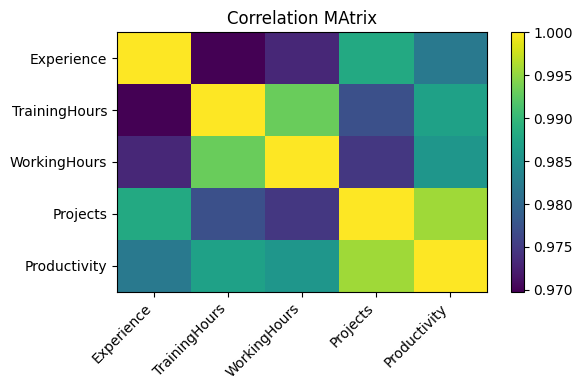

In [8]:
corr = data.corr(numeric_only=True)
display(corr["Productivity"].sort_values(ascending=False))

plt.figure(figsize=(6,4))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Correlation MAtrix")
plt.tight_layout()
plt.show()

In [9]:
X = data[["Experience", "TrainingHours", "WorkingHours", "Projects"]]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values("VIF", ascending=False)

,Feature,VIF
3,Projects,378.166547
0,Experience,163.320623
1,TrainingHours,146.672569
2,WorkingHours,41.932198


In [10]:
X

,Experience,TrainingHours,WorkingHours,Projects
0,2,40,38,3
1,5,60,42,6
2,1,20,35,2
3,8,80,45,8
4,4,50,40,5
5,10,90,48,9
6,3,30,37,4
7,6,70,44,7
8,7,75,46,7
9,2,25,36,3


In [11]:
y = data["Productivity"]
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     451.2
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.40e-06
Time:                        20:51:11   Log-Likelihood:                -9.8075
No. Observations:                  10   AIC:                             29.62
Df Residuals:                       5   BIC:                             31.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4253     19.804      0.880

In [12]:
X_const

,const,Experience,TrainingHours,WorkingHours,Projects
0,1.0,2,40,38,3
1,1.0,5,60,42,6
2,1.0,1,20,35,2
3,1.0,8,80,45,8
4,1.0,4,50,40,5
5,1.0,10,90,48,9
6,1.0,3,30,37,4
7,1.0,6,70,44,7
8,1.0,7,75,46,7
9,1.0,2,25,36,3


In [13]:
lr = LinearRegression()
lr.fit(X, y)
y_pred_train = lr.predict(X)
rmse_train= np.sqrt(mean_squared_error(y, y_pred_train))
r2_train = r2_score(y, y_pred_train)
print("Intercept b(0):", lr.intercept_)
print("Coefficients (b1..b4):")

for name, coef in zip(X.columns, lr.coef_):
    print(f" {name:12s}: {coef:.4f}")

print("\nTrain RMSE:", rmse_train)
print("Train R^2 :", r2_train)

Intercept b(0): 17.425339366515743
Coefficients (b1..b4):
 Experience  : -0.9638
 TrainingHours: 0.0380
 WorkingHours: 0.8190
 Projects    : 4.7014

Train RMSE: 0.6452050780644741
Train R^2 : 0.9972374438067544


In [14]:
loo = LeaveOneOut()
y_pred_loo = cross_val_predict(lr, X, y, cv=loo)

rmse_loo = np.sqrt(mean_squared_error(y, y_pred_loo))
r2_loo = r2_score(y, y_pred_loo)

print("LOOCV RMSE:", rmse_loo)
print("LOOCV R^2 :", r2_loo)

LOOCV RMSE: 1.840360969236367
LOOCV R^2 : 0.9775238668983435


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr_scaled = LinearRegression()
lr_scaled.fit(X_scaled, y)

std_coefs = pd.Series(lr_scaled.coef_, index=X.columns).sort_values(key=np.abs, ascending=False)
print("Standardized coefficients (compare absolute impact): ")
display(std_coefs)

Standardized coefficients (compare absolute impact): 


Projects         10.554521
WorkingHours      3.540715
Experience       -2.684839
TrainingHours     0.890581
dtype: float64

Interpretation (Answers)
1) Which factor most strongly impacts productivity?

Use the standardized coefficients from Cell 10.
The factor with the largest absolute standardized coefficient is the strongest signal.
Note: If VIF is huge (Cell 6), predictors overlap → coefficients can be unstable. So we combine:
standardized coefficient ranking
domain sense
and multicollinearity warning

2) How does training affect productivity?

Look at the TrainingHours coefficient (Cell 8).
Interpretation: holding other variables constant, +1 training hour changes productivity by that coefficient.
Example (if your coefficient is ~0.038):
+10 training hours → ~+0.38 productivity points (small marginal effect)

3) Should the company increase training hours or working hours?

Compare marginal effects:
WorkingHours coefficient vs TrainingHours coefficient (Cell 8). If WorkingHours >> TrainingHours, the linear model suggests working hours has higher immediate gain.
But: more working hours can cause burnout (linear model doesn't know fatigue). Training may be safer long-term.

4) What happens if Working Hours increase beyond optimal limits?

A basic linear regression assumes "more hours always increases productivity." Realistically, after a point productivity can plateau or drop. To model that, add a quadratic term (WorkingHours^2) — see Cell 12.

5) Can productivity ever decrease with more experience?

In your multivariate model, Experience might even have a negative coefficient due to multicollinearity. This does NOT automatically mean experience is bad — it can happen because experience overlaps with projects/training/hours. In real life, productivity can decrease with experience due to burnout/stagnation/mismatch.

6) How would you detect overfitting in this model?

Compare Train RMSE (Cell 8) vs LOOCV RMSE (Cell 9)
If CV error is much worse than training error → overfitting/instability
Also: huge VIF values indicate unstable coefficients

7) Suggest one new feature to improve prediction accuracy

Good new feature: Task/Project Complexity Score Why: Two employees can work same hours but handle very different difficulty.

In [16]:
data2 = data.copy()
data2["WorkingHours_sq"] = data2["WorkingHours"] ** 2

X2 = data2[["Experience", "TrainingHours", "WorkingHours", "WorkingHours_sq", "Projects"]]
y2 = data2["Productivity"]

# Fit OLS to interpret the curve
ols2 = sm.OLS(y2, sm.add_constant(X2)).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     607.4
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           7.56e-06
Time:                        20:54:14   Log-Likelihood:                -6.0975
No. Observations:                  10   AIC:                             24.20
Df Residuals:                       4   BIC:                             26.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -128.6282     71.281     

In [17]:
b0 = lr.intercept_
coefs = dict(zip(X.columns, lr.coef_))

equation = (
    f"Productivity = {b0:.3f}"
    f" + ({coefs['Experience']:.3f})*Experience"
    f" + ({coefs['TrainingHours']:.3f})*TrainingHours"
    f" + ({coefs['WorkingHours']:.3f})*WorkingHours"
    f" + ({coefs['Projects']:.3f})*Projects"
)

print(equation)

Productivity = 17.425 + (-0.964)*Experience + (0.038)*TrainingHours + (0.819)*WorkingHours + (4.701)*Projects
